In [ ]:
! pip install kaggle kagglehub pandas --quiet
import kaggle
import kagglehub
import pandas as pd
import zipfile
import os

target_path = "D:/python/ml/kaggle"
if not os.path.exists(target_path):
  os.makedirs(target_path)

os.chdir(target_path)
kaggle.api.dataset_download_files("uom190346a/global-coffee-health-dataset", path=target_path, unzip=True)

df = pd.read_csv(os.path.join(target_path, "synthetic_coffee_health_10000.csv"))
df.head()



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset URL: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Предметная область - исследование взаимосвязи между потреблением кофе, образом жизни и показателями здоровья человека.
Источник данных - платформа Kaggle (https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset).
Характер данных - синтетические данные, отражающие реальные паттерны и корреляции, наблюдаемые в исследованиях. 

Атрибуты: 
1. ID (Integer) - уникальный идентификатор записи
2. Age (Integer) - возраст участника (18-80 лет)
3. Gender (Categorical) - пол (Male, Female, Other)
4. Country (Categorical) - страна проживания (20 стран)
5. Coffee_Intake (Float) - дневное потребление кофе в чашках (0-10)
6. Caffeine_mg (Float) - расчетное дневное потребление кофеина в мг
7. Sleep_Hours (Float) - среднее количество часов сна за ночь (3-10 часов)
8. Sleep_Quality (Categorical) - качество сна (Poor, Fair, Good, Excellent) (напрямую зависит от часов сна)
9. BMI (Float) - индекс массы тела (15-40)
10. Heart_Rate (Integer) - сердечный ритм в состоянии покоя (50-110 уд/мин)
11. Stress_Level (Categorical) - уровень стресса (Low, Medium, High)
12. Physical_Activity_Hours (Float) - часы физической активности в неделю (0-15 часов)
13. Health_Issues (Categorical) - проблемы со здоровьем (None, Mild, Moderate, Severe)
14. Occupation (Categorical) - род занятий (Office, Healthcare, Student, Service, Other)
15. Smoking (Boolean) - курение (0 = Нет, 1 = Да)
16. Alcohol_Consumption (Boolean) - потребление алкоголя (0 = Нет, 1 = Да)


Задача анализа:
1. Исследование корреляций между потреблением кофе, качеством сна и показателями здоровья.
2. Анализ факторов жизненного стиля таких как физическая активность, курение и потребление алкоголя
3. Построение предсказательной модели для качества сна, уровня стресса или риска здоровья
4. Демографический анализ паттернов потребления кофе разных стран

Атрибут айди не представляет никакую практическую ценность, поэтому от него можно избавиться
Пол "Other" не дает никакую информацию, поэтому удаляем все строки с ним.
Так как "Sleep_Quality" зависит только от колличества часов сна, то можно столбец убрать.

In [ ]:
df = df.drop('ID', axis=1)
df = df.query('Gender != "Other"').copy()
df = df.drop('Sleep_Quality', axis=1)

! pip install numpy matplotlib seaborn --quiet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_column(column_name, df):
    print(f"анализ атрибута {column_name} \n")
    missing_count = df[column_name].isnull().sum()
    missing_percent = missing_count / len(df) * 100
    print(f"Пропущенные значения: {missing_count} ({missing_percent:.2f}%)")

    dtype = df[column_name].dtype
    print(f"Тип данных:{dtype}")

    if np.issubdtype(dtype, np.number):
        print(f"Среднее значение: {df[column_name].mean():.2f}")
        print(f"Стандартное отклонение: {df[column_name].std():.2f}")
        print(f"Минимальное значение: {df[column_name].min()}")
        print(f"Максимальное значение: {df[column_name].max()}")
        print(f"Медиана: {df[column_name].median()}")

        plt.figure(figsize=(10, 6))
        sns.histplot(df[column_name], kde=True)
        plt.title(f'Распределение {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Частота')
        plt.show()

        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[column_name])
        plt.title(f'Boxplot для {column_name}')
        plt.xlabel(column_name)
        plt.show()
    else:
        value_counts = df[column_name].value_counts()
        print("Распределение значений:")
        print(value_counts)
        plt.figure(figsize=(12, 6))
        value_counts.plot(kind='bar')
        plt.title(f'Распределение для {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Количество')
        plt.xticks(rotation=45)
        plt.show()
    
    print("\n" + "="*50 + "\n")



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


анализ атрибута Age 

Пропущенные значения: 0 (0.00%)
Тип данных:int64
Среднее значение: 34.96
Стандартное отклонение: 11.17
Минимальное значение: 18
Максимальное значение: 80
Медиана: 34.0


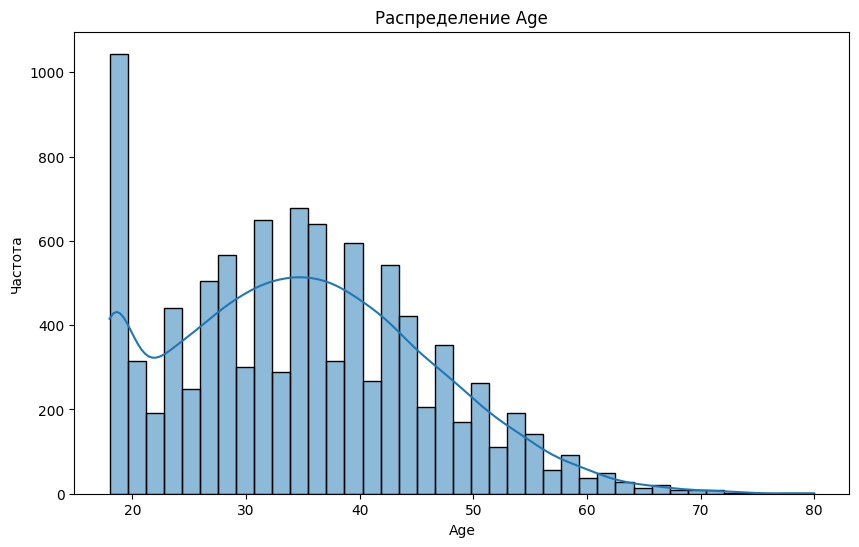

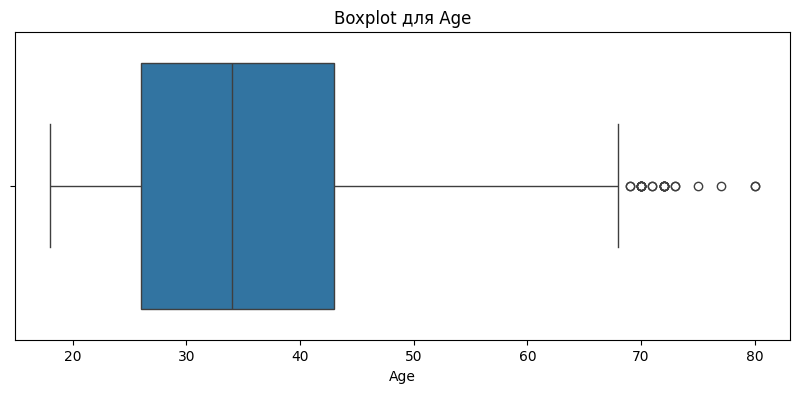



анализ атрибута Gender 

Пропущенные значения: 0 (0.00%)
Тип данных:object
Распределение значений:
Gender
Female    5001
Male      4773
Name: count, dtype: int64


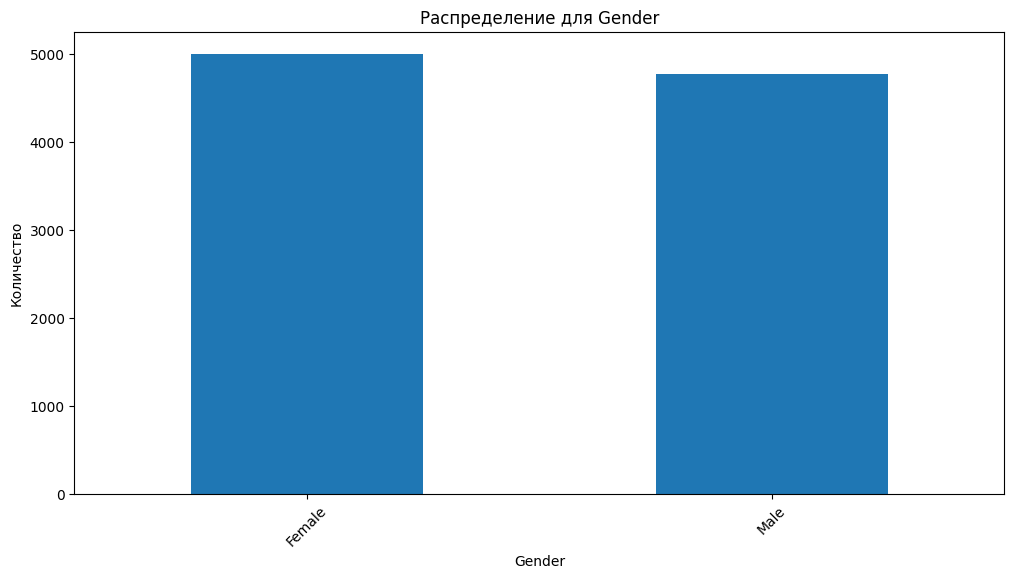



анализ атрибута Country 

Пропущенные значения: 0 (0.00%)
Тип данных:object
Распределение значений:
Country
Canada         536
Norway         515
India          512
China          510
Sweden         505
UK             504
Finland        500
Italy          499
South Korea    497
Belgium        488
Germany        488
France         487
Australia      486
Switzerland    485
Netherlands    484
Spain          472
Mexico         470
Japan          456
Brazil         441
USA            439
Name: count, dtype: int64


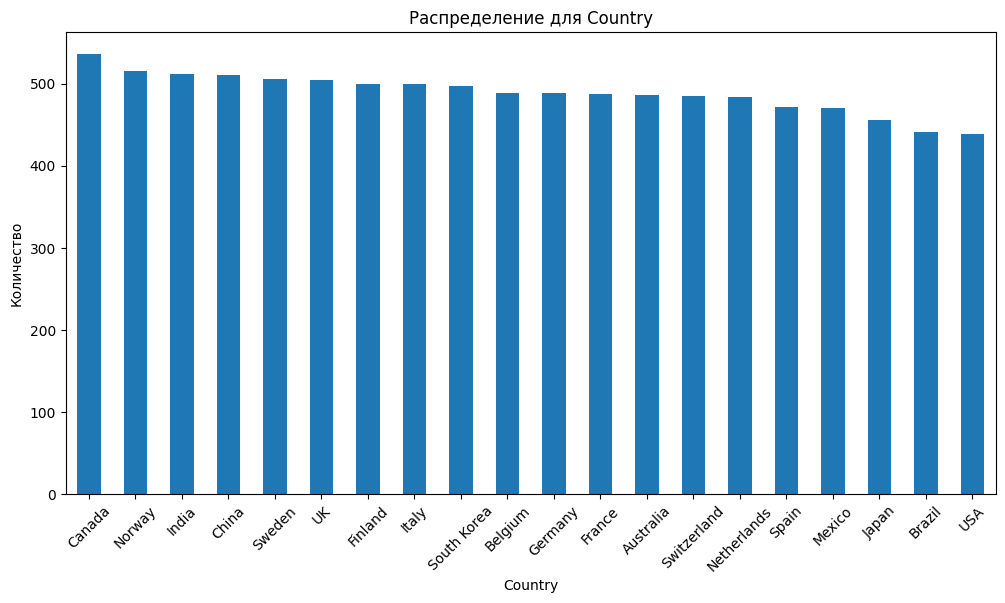



анализ атрибута Coffee_Intake 

Пропущенные значения: 0 (0.00%)
Тип данных:float64
Среднее значение: 2.51
Стандартное отклонение: 1.45
Минимальное значение: 0.0
Максимальное значение: 8.2
Медиана: 2.5


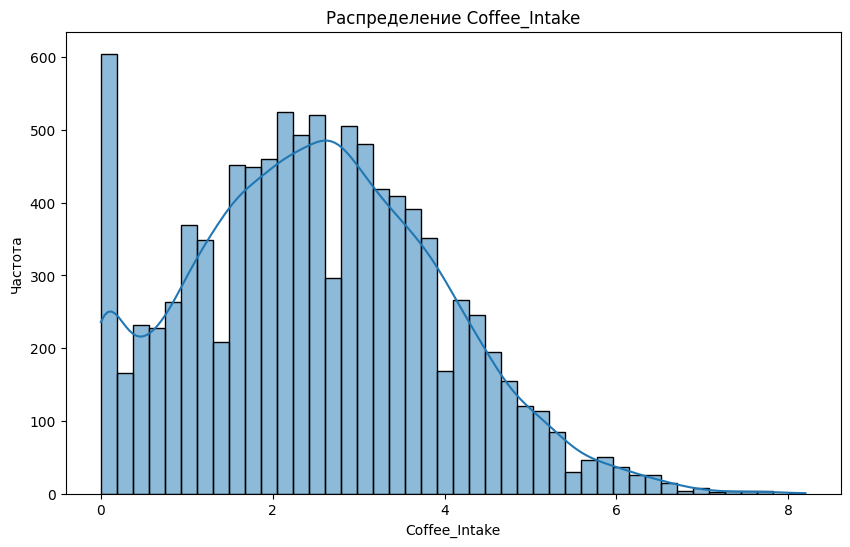

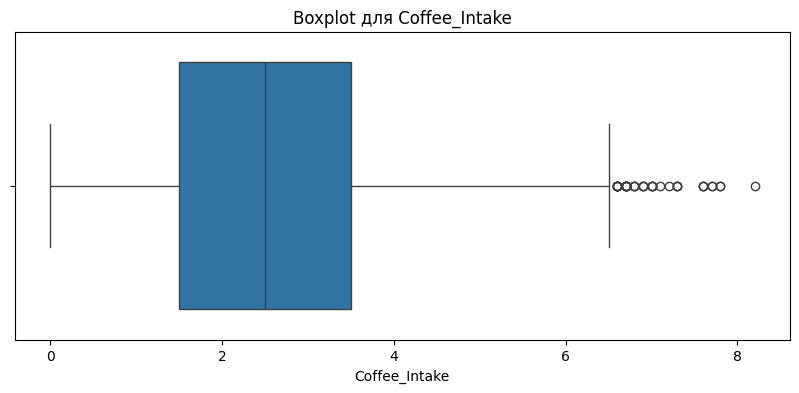



анализ атрибута Caffeine_mg 

Пропущенные значения: 0 (0.00%)
Тип данных:float64
Среднее значение: 238.45
Стандартное отклонение: 137.60
Минимальное значение: 0.0
Максимальное значение: 780.3
Медиана: 235.5


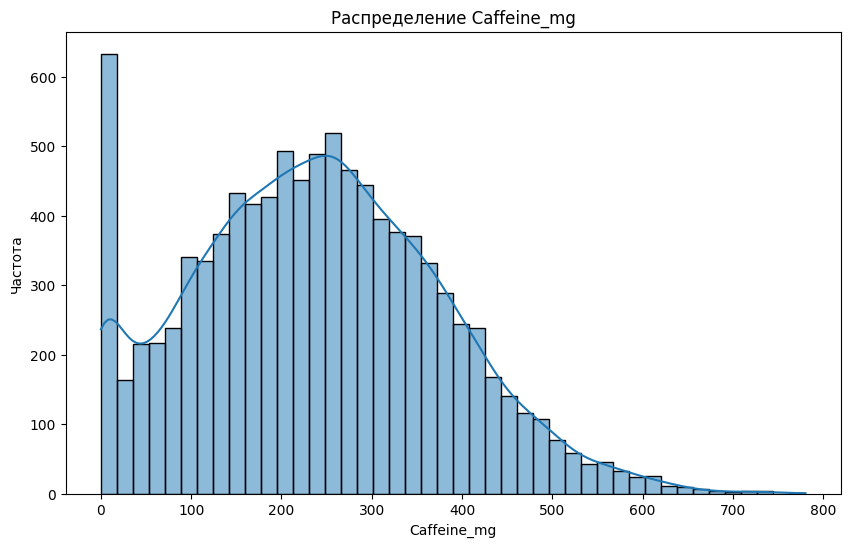

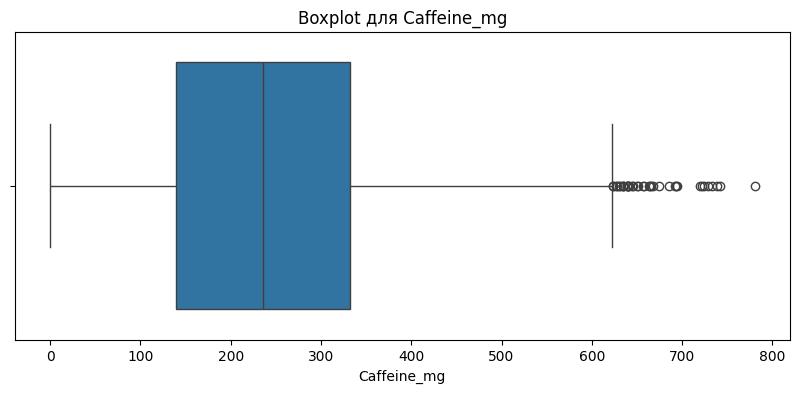



анализ атрибута Sleep_Hours 

Пропущенные значения: 0 (0.00%)
Тип данных:float64
Среднее значение: 6.64
Стандартное отклонение: 1.22
Минимальное значение: 3.0
Максимальное значение: 10.0
Медиана: 6.6


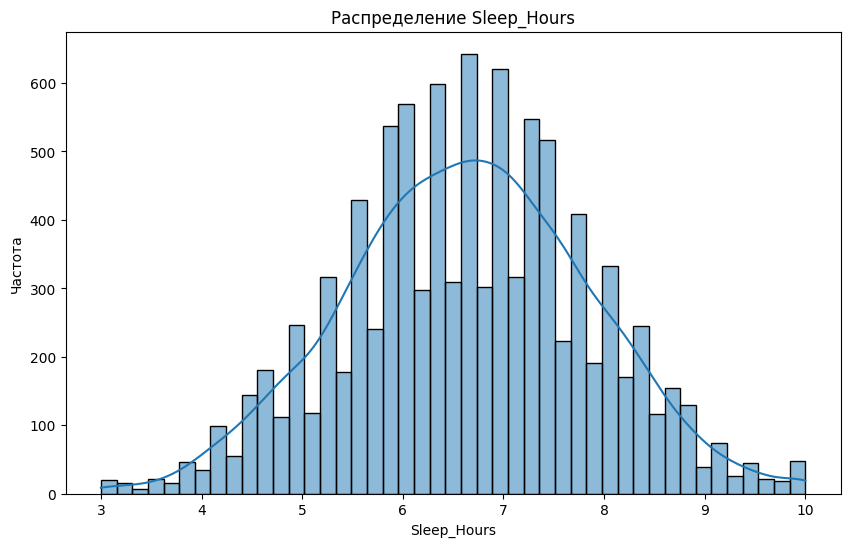

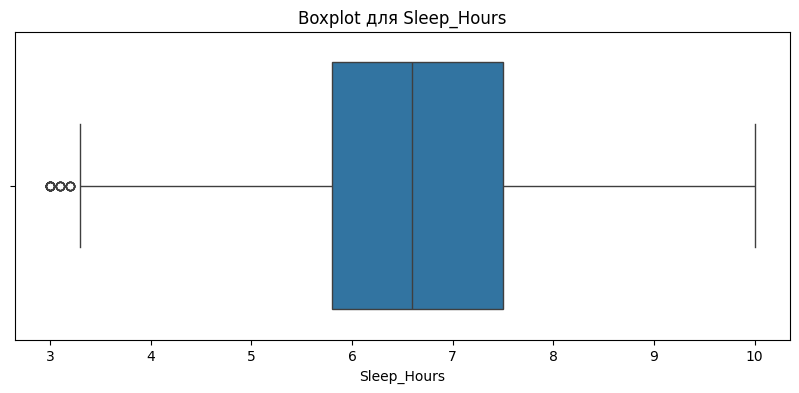



анализ атрибута BMI 

Пропущенные значения: 0 (0.00%)
Тип данных:float64
Среднее значение: 23.99
Стандартное отклонение: 3.91
Минимальное значение: 15.0
Максимальное значение: 38.2
Медиана: 24.0


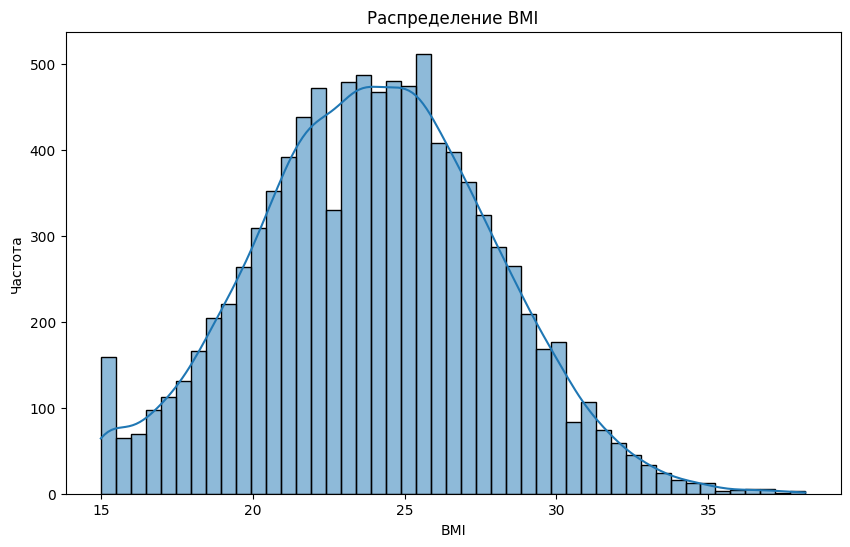

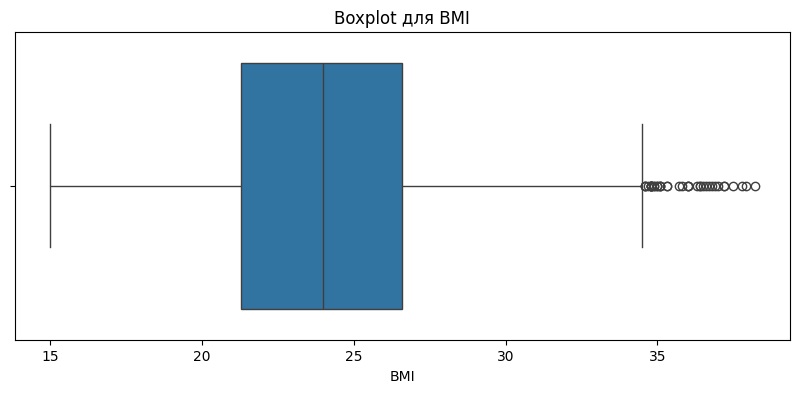



анализ атрибута Heart_Rate 

Пропущенные значения: 0 (0.00%)
Тип данных:int64
Среднее значение: 70.63
Стандартное отклонение: 9.82
Минимальное значение: 50
Максимальное значение: 109
Медиана: 71.0


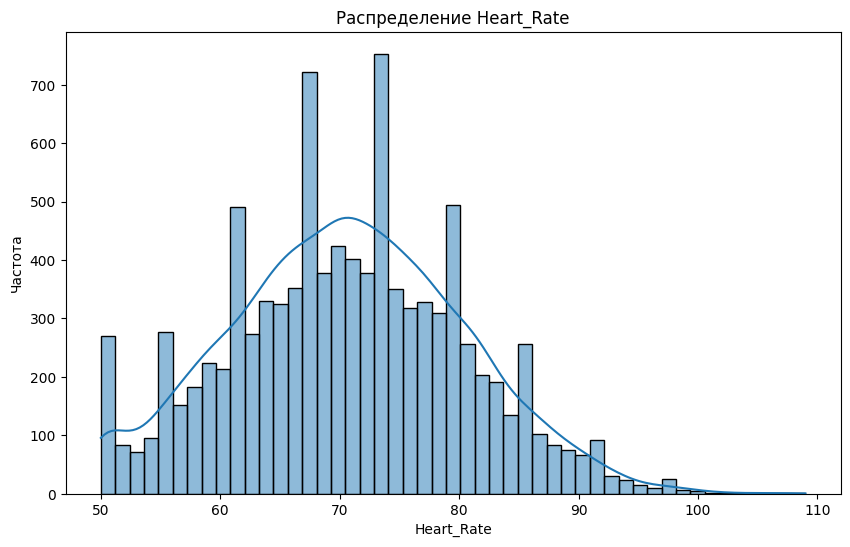

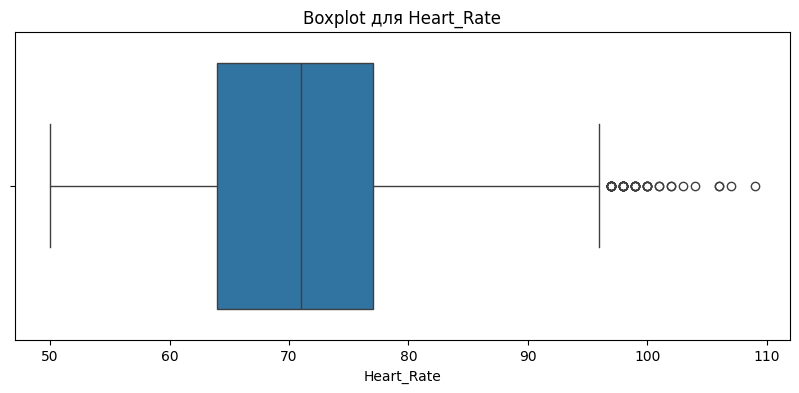



анализ атрибута Stress_Level 

Пропущенные значения: 0 (0.00%)
Тип данных:object
Распределение значений:
Stress_Level
Low       6828
Medium    2006
High       940
Name: count, dtype: int64


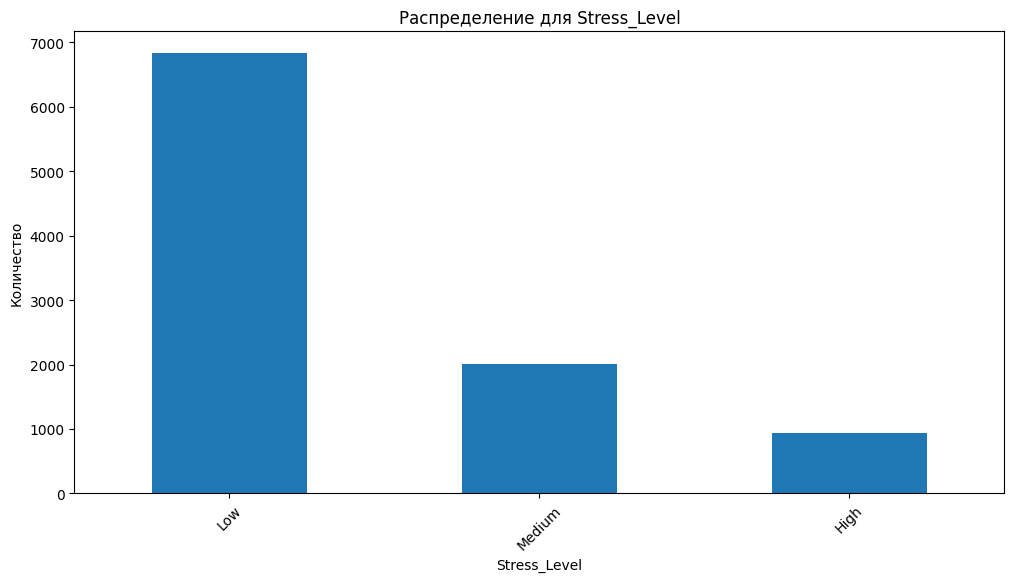



анализ атрибута Physical_Activity_Hours 

Пропущенные значения: 0 (0.00%)
Тип данных:float64
Среднее значение: 7.50
Стандартное отклонение: 4.32
Минимальное значение: 0.0
Максимальное значение: 15.0
Медиана: 7.5


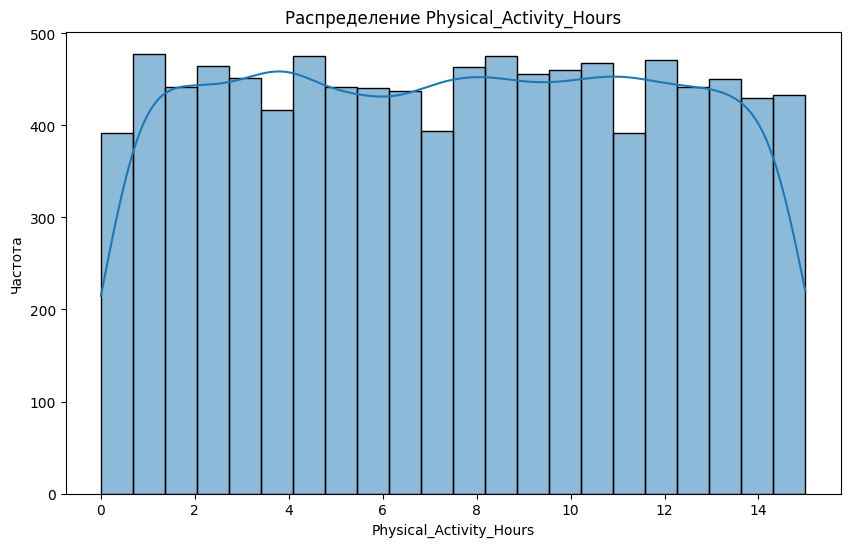

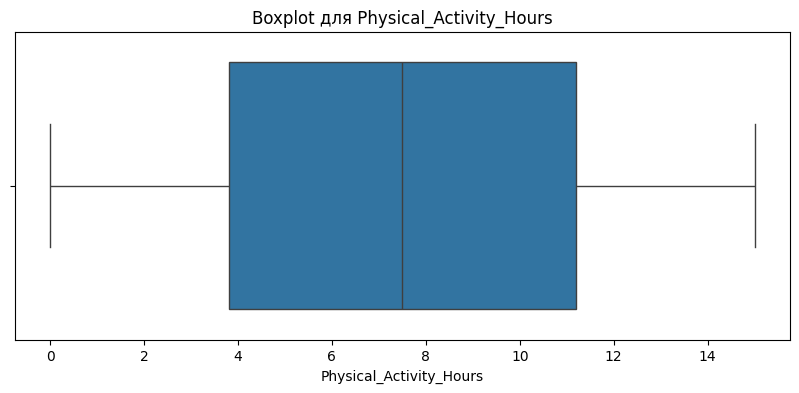



анализ атрибута Health_Issues 

Пропущенные значения: 5808 (59.42%)
Тип данных:object
Распределение значений:
Health_Issues
Mild        3491
Moderate     458
Severe        17
Name: count, dtype: int64


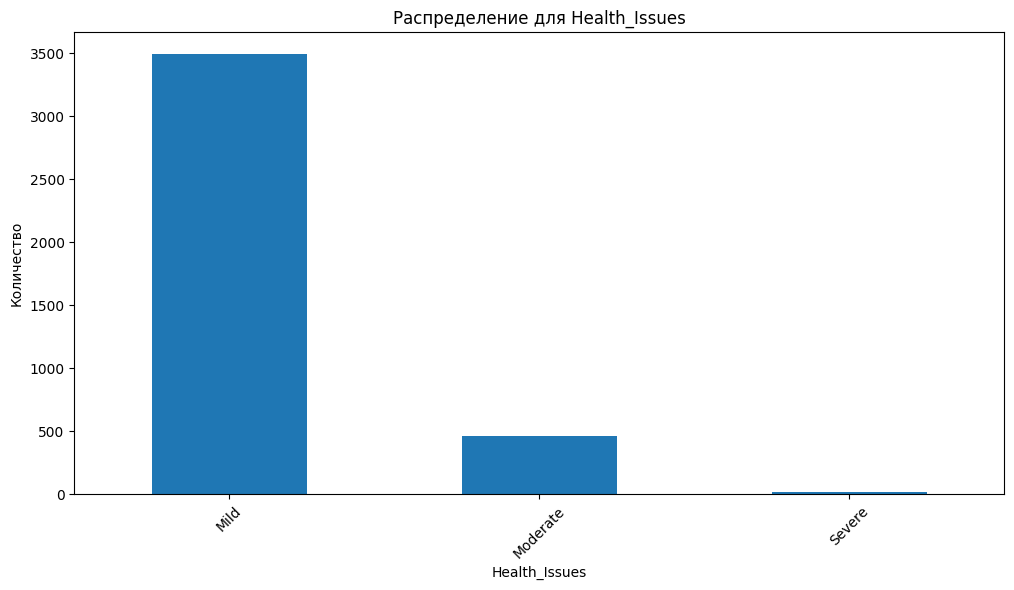



анализ атрибута Occupation 

Пропущенные значения: 0 (0.00%)
Тип данных:object
Распределение значений:
Occupation
Office        2023
Other         1992
Student       1935
Healthcare    1920
Service       1904
Name: count, dtype: int64


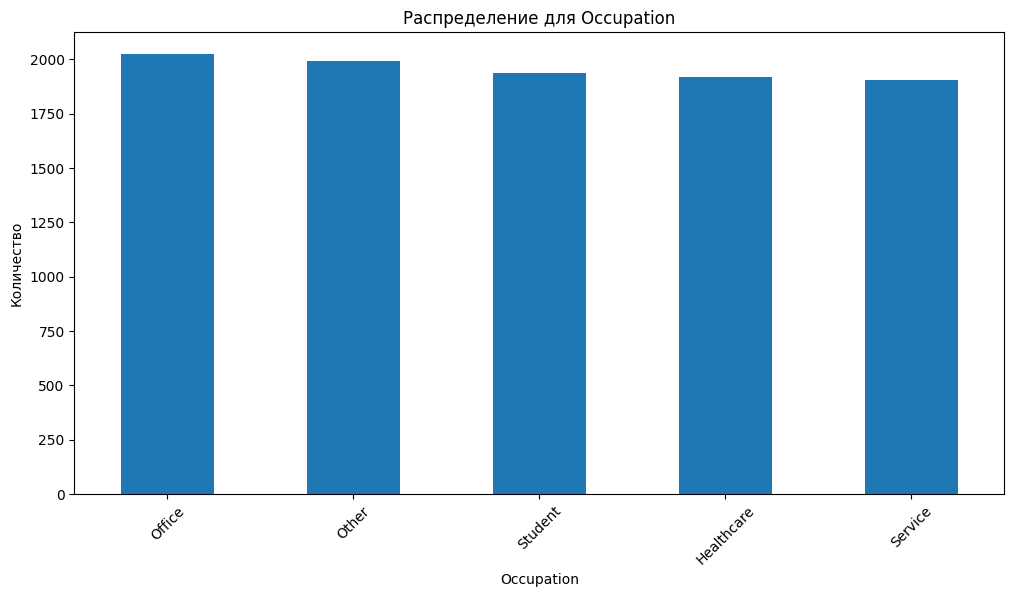



анализ атрибута Smoking 

Пропущенные значения: 0 (0.00%)
Тип данных:int64
Среднее значение: 0.20
Стандартное отклонение: 0.40
Минимальное значение: 0
Максимальное значение: 1
Медиана: 0.0


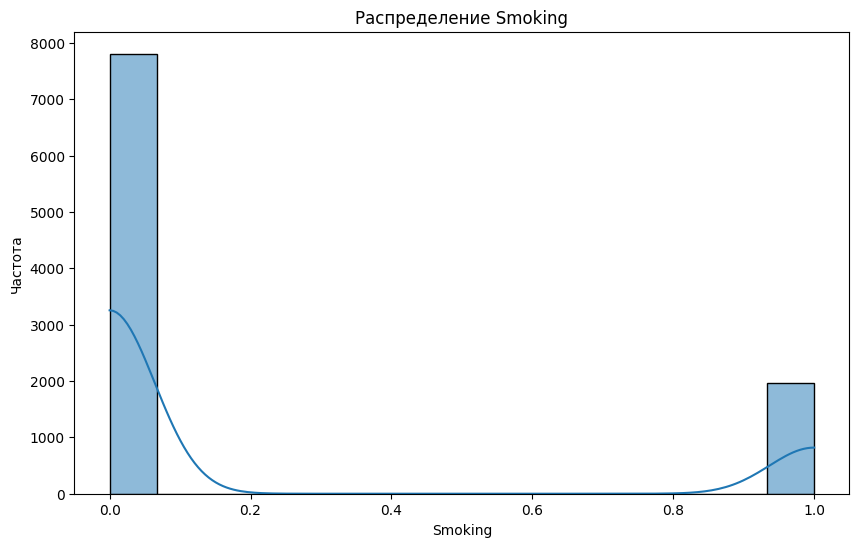

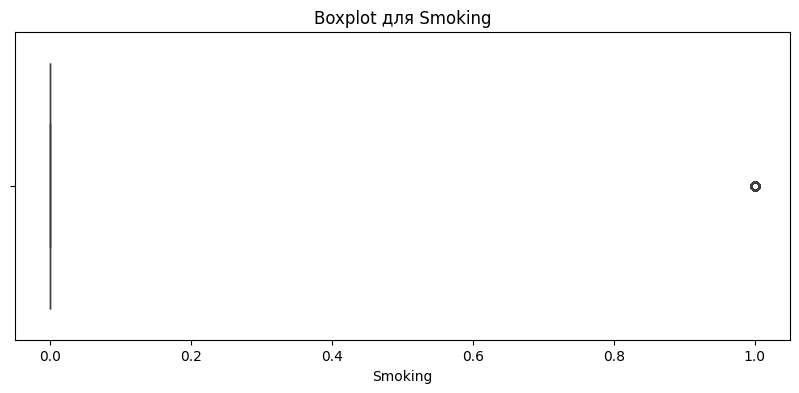



анализ атрибута Alcohol_Consumption 

Пропущенные значения: 0 (0.00%)
Тип данных:int64
Среднее значение: 0.30
Стандартное отклонение: 0.46
Минимальное значение: 0
Максимальное значение: 1
Медиана: 0.0


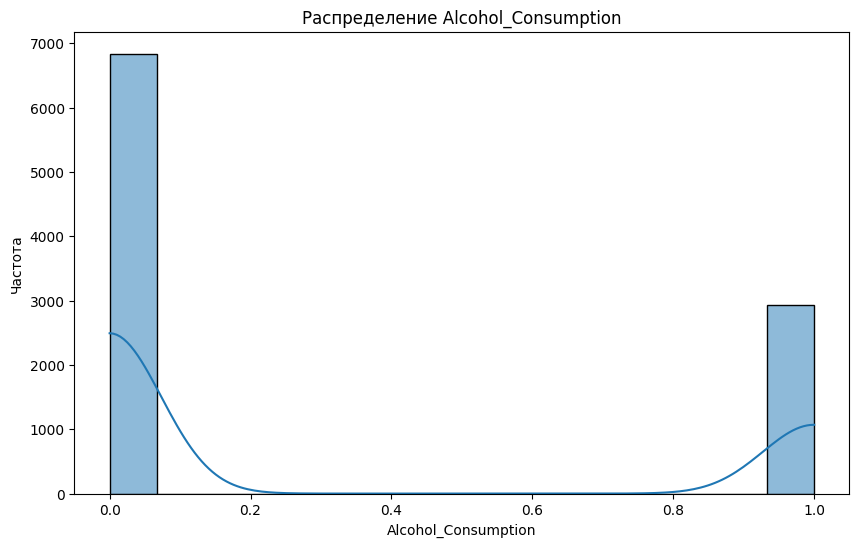

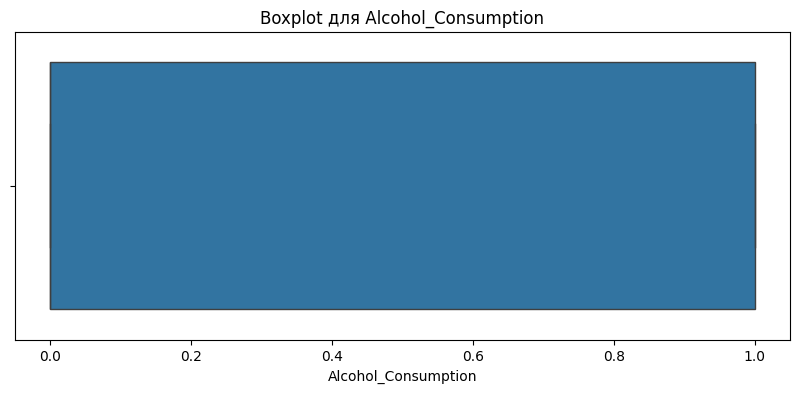

In [3]:
for column in df.columns:
    analyze_column(column_name=column, df=df)

Выбросов не обнаружено

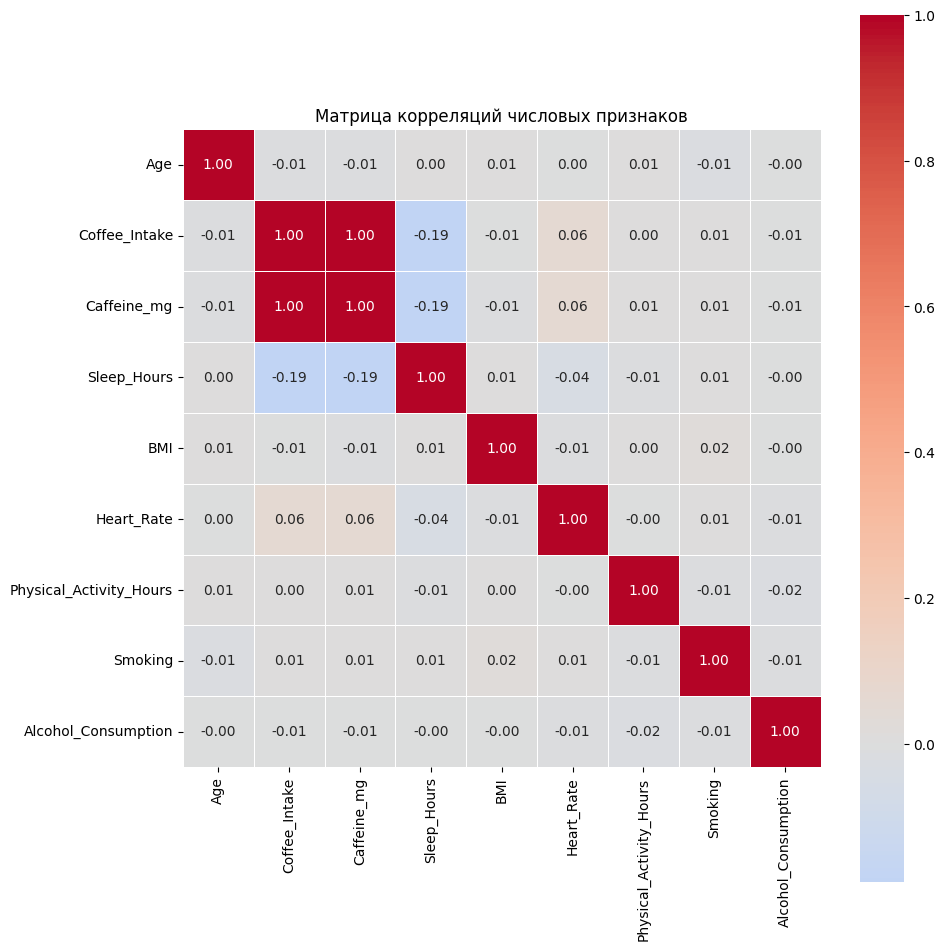

In [ ]:
from scipy.stats import pearsonr
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
plt.show()

In [ ]:
# Находим пары признаков с высокой корреляцией (|r| > 0.7)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print("Высококоррелированные пары признаков (|r| > 0.7):")
for pair in high_corr:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

low_corr_features = []
for col in correlation_matrix.columns:
    max_corr = max(abs(correlation_matrix[col].drop(col)))
    if max_corr < 0.1:
        low_corr_features.append((col, max_corr))

print("\nПризнаки с низкой корреляцией (макс. |r| < 0.1):")
for feature in low_corr_features:
    print(f"{feature[0]}: макс. корреляция = {feature[1]:.3f}")

Высококоррелированные пары признаков (|r| > 0.7):
Caffeine_mg - Coffee_Intake: 1.000

Признаки с низкой корреляцией (макс. |r| < 0.1):
Age: макс. корреляция = 0.014
BMI: макс. корреляция = 0.016
Heart_Rate: макс. корреляция = 0.058
Physical_Activity_Hours: макс. корреляция = 0.017
Smoking: макс. корреляция = 0.016
Alcohol_Consumption: макс. корреляция = 0.017


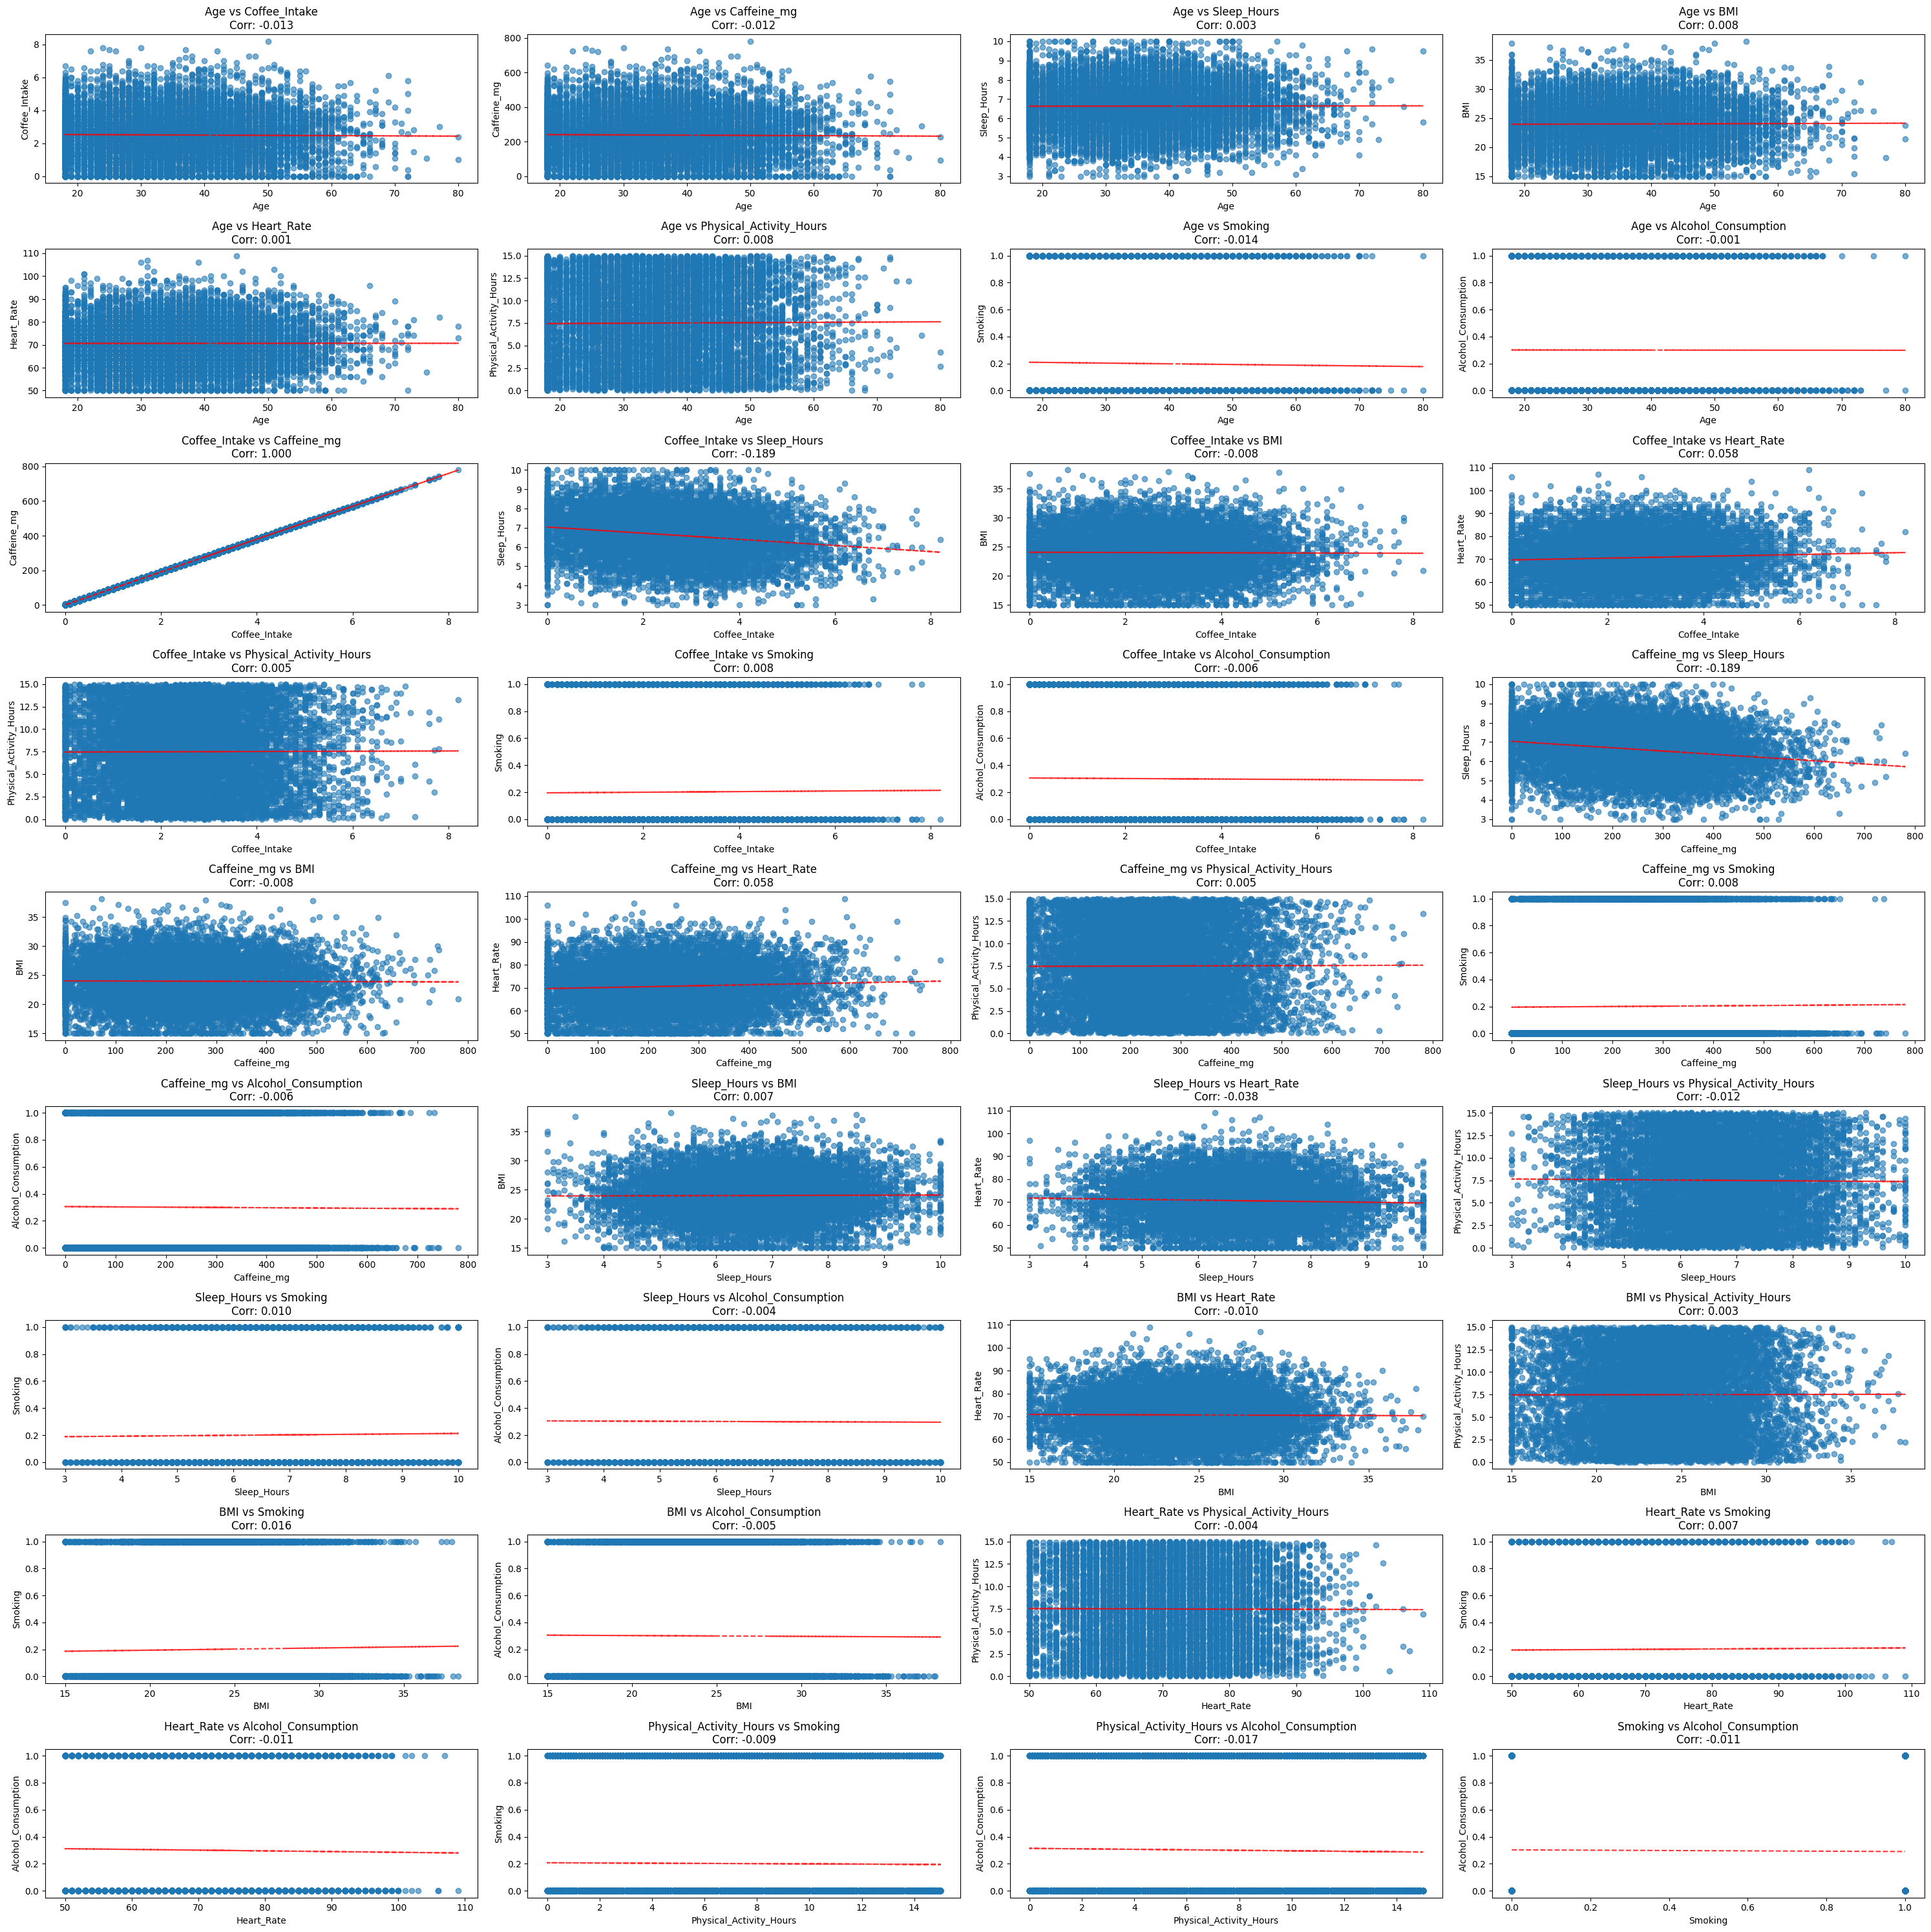

In [21]:
from itertools import combinations


pairs = list(combinations(numeric_columns, 2))

fig, axes = plt.subplots(9, 4, figsize=(30, 30))
axes = axes.ravel()

for i, (x, y) in enumerate(pairs):
    corr, p_value = pearsonr(df[x], df[y])
    
    axes[i].scatter(df[x], df[y], alpha=0.6)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'{x} vs {y}\nCorr: {corr:.3f}')
    
    z = np.polyfit(df[x], df[y], 1)
    p = np.poly1d(z)
    axes[i].plot(df[x], p(df[x]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

Из графиков видно, что высокой корреляцией обладает только: Caffeine_mg - Coffee_Intake